In [17]:
# Code block 1

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

In [18]:
# Code block 2
# CUDA?
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("CUDA Available?", cuda)

CUDA Available? False


In [19]:
# Code block 3

# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [20]:
# Code block 4

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [21]:
# Code block 5

batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

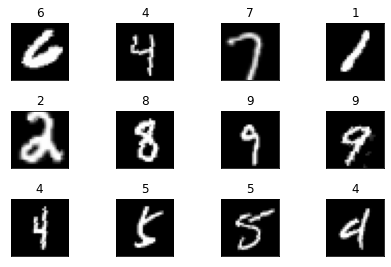

In [22]:
# Code block 6

import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [26]:
# Code block 10

%run ./model.py
%run ./Utils.py

Model = Net().to(device) # Calling it from model.py
process = Processing() # Calling it from Utils.py

optimizer = optim.SGD(Model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  process.train(Model,device,train_loader,optimizer,criterion)
  process.test(Model,device,test_loader,criterion)
  scheduler.step()


0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.6763 Batch_id=117 Accuracy=36.99: 100%|██████████| 118/118 [01:08<00:00,  1.71it/s]


Test set: Average loss: 1.9439, Accuracy: 3157/10000 (31.57%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1863 Batch_id=117 Accuracy=69.08: 100%|██████████| 118/118 [01:32<00:00,  1.28it/s]


Test set: Average loss: 0.2035, Accuracy: 9337/10000 (93.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1437 Batch_id=117 Accuracy=94.08: 100%|██████████| 118/118 [01:32<00:00,  1.28it/s]


Test set: Average loss: 0.0882, Accuracy: 9728/10000 (97.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0849 Batch_id=117 Accuracy=96.19: 100%|██████████| 118/118 [01:27<00:00,  1.35it/s]


Test set: Average loss: 0.0666, Accuracy: 9782/10000 (97.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1073 Batch_id=117 Accuracy=96.97: 100%|██████████| 118/118 [01:20<00:00,  1.46it/s]


Test set: Average loss: 0.0535, Accuracy: 9832/10000 (98.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0692 Batch_id=117 Accuracy=97.41: 100%|██████████| 118/118 [01:20<00:00,  1.46it/s]


Test set: Average loss: 0.0437, Accuracy: 9857/10000 (98.57%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0834 Batch_id=117 Accuracy=97.72: 100%|██████████| 118/118 [01:34<00:00,  1.24it/s]


Test set: Average loss: 0.0397, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0779 Batch_id=117 Accuracy=97.81: 100%|██████████| 118/118 [01:37<00:00,  1.21it/s]


Test set: Average loss: 0.0350, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0624 Batch_id=117 Accuracy=98.06: 100%|██████████| 118/118 [01:37<00:00,  1.21it/s]


Test set: Average loss: 0.0285, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0478 Batch_id=117 Accuracy=98.18: 100%|██████████| 118/118 [01:34<00:00,  1.25it/s]


Test set: Average loss: 0.0326, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0981 Batch_id=117 Accuracy=98.33: 100%|██████████| 118/118 [01:30<00:00,  1.31it/s]


Test set: Average loss: 0.0311, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0254 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [01:29<00:00,  1.31it/s]


Test set: Average loss: 0.0320, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0062 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [01:29<00:00,  1.31it/s]


Test set: Average loss: 0.0295, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0323 Batch_id=117 Accuracy=98.58: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]


Test set: Average loss: 0.0263, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0784 Batch_id=117 Accuracy=98.69: 100%|██████████| 118/118 [01:34<00:00,  1.25it/s]


Test set: Average loss: 0.0266, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0112 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [01:28<00:00,  1.33it/s]


Test set: Average loss: 0.0220, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0491 Batch_id=117 Accuracy=98.92: 100%|██████████| 118/118 [01:32<00:00,  1.28it/s]


Test set: Average loss: 0.0211, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0173 Batch_id=117 Accuracy=98.94: 100%|██████████| 118/118 [01:32<00:00,  1.27it/s]


Test set: Average loss: 0.0209, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0668 Batch_id=117 Accuracy=98.98: 100%|██████████| 118/118 [01:30<00:00,  1.31it/s]


Test set: Average loss: 0.0211, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0271 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [01:30<00:00,  1.31it/s]


Test set: Average loss: 0.0207, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.


In [20]:
# code block 12

from torchsummary import summary
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
